In [90]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
os.chdir("/")
if not os.path.isdir("/kaggle/input"):
    os.mkdir("/kaggle/input")

In [92]:
import kagglehub
os.chdir("/kaggle/input")
# Download latest version
path = kagglehub.dataset_download("jeevannagaraj/indian-liver-patient-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/indian-liver-patient-dataset


In [93]:
Liver_data=pd.read_csv("/kaggle/input/indian-liver-patient-dataset/Indian Liver Patient Dataset (ILPD).csv")

In [111]:
df=Liver_data.copy()

Performing **EDA**

In [112]:
df.head(8)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1


In [113]:
df['is_patient'].value_counts(normalize=True)

,proportion
is_patient,
1,0.713551
2,0.286449


In [114]:
df['is_patient']= df['is_patient'].apply(lambda x: x==1).astype(int)

Text(0, 0.5, 'Count')

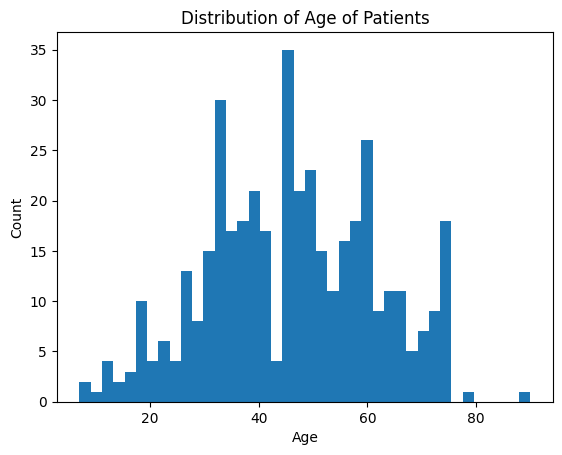

In [115]:
age_patients= df.is_patient == 1
df[age_patients].age.plot(kind='hist',bins=40)
plt.title('Distribution of Age of Patients')
plt.xlabel('Age')
plt.ylabel('Count')

In [116]:
df['gender']= pd.get_dummies(df['gender'],drop_first=True)

<Axes: >

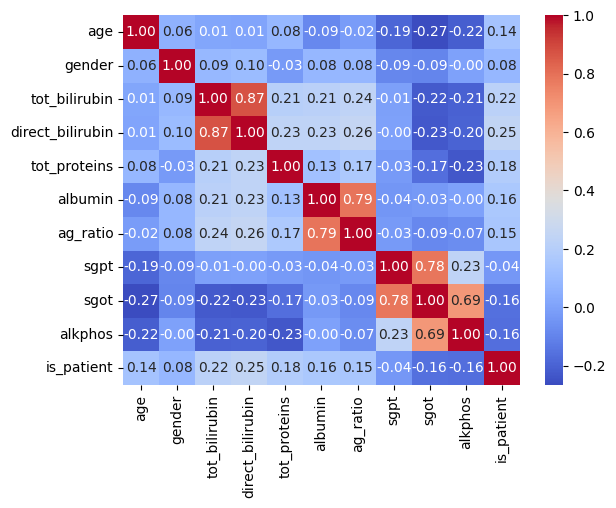

In [117]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm')

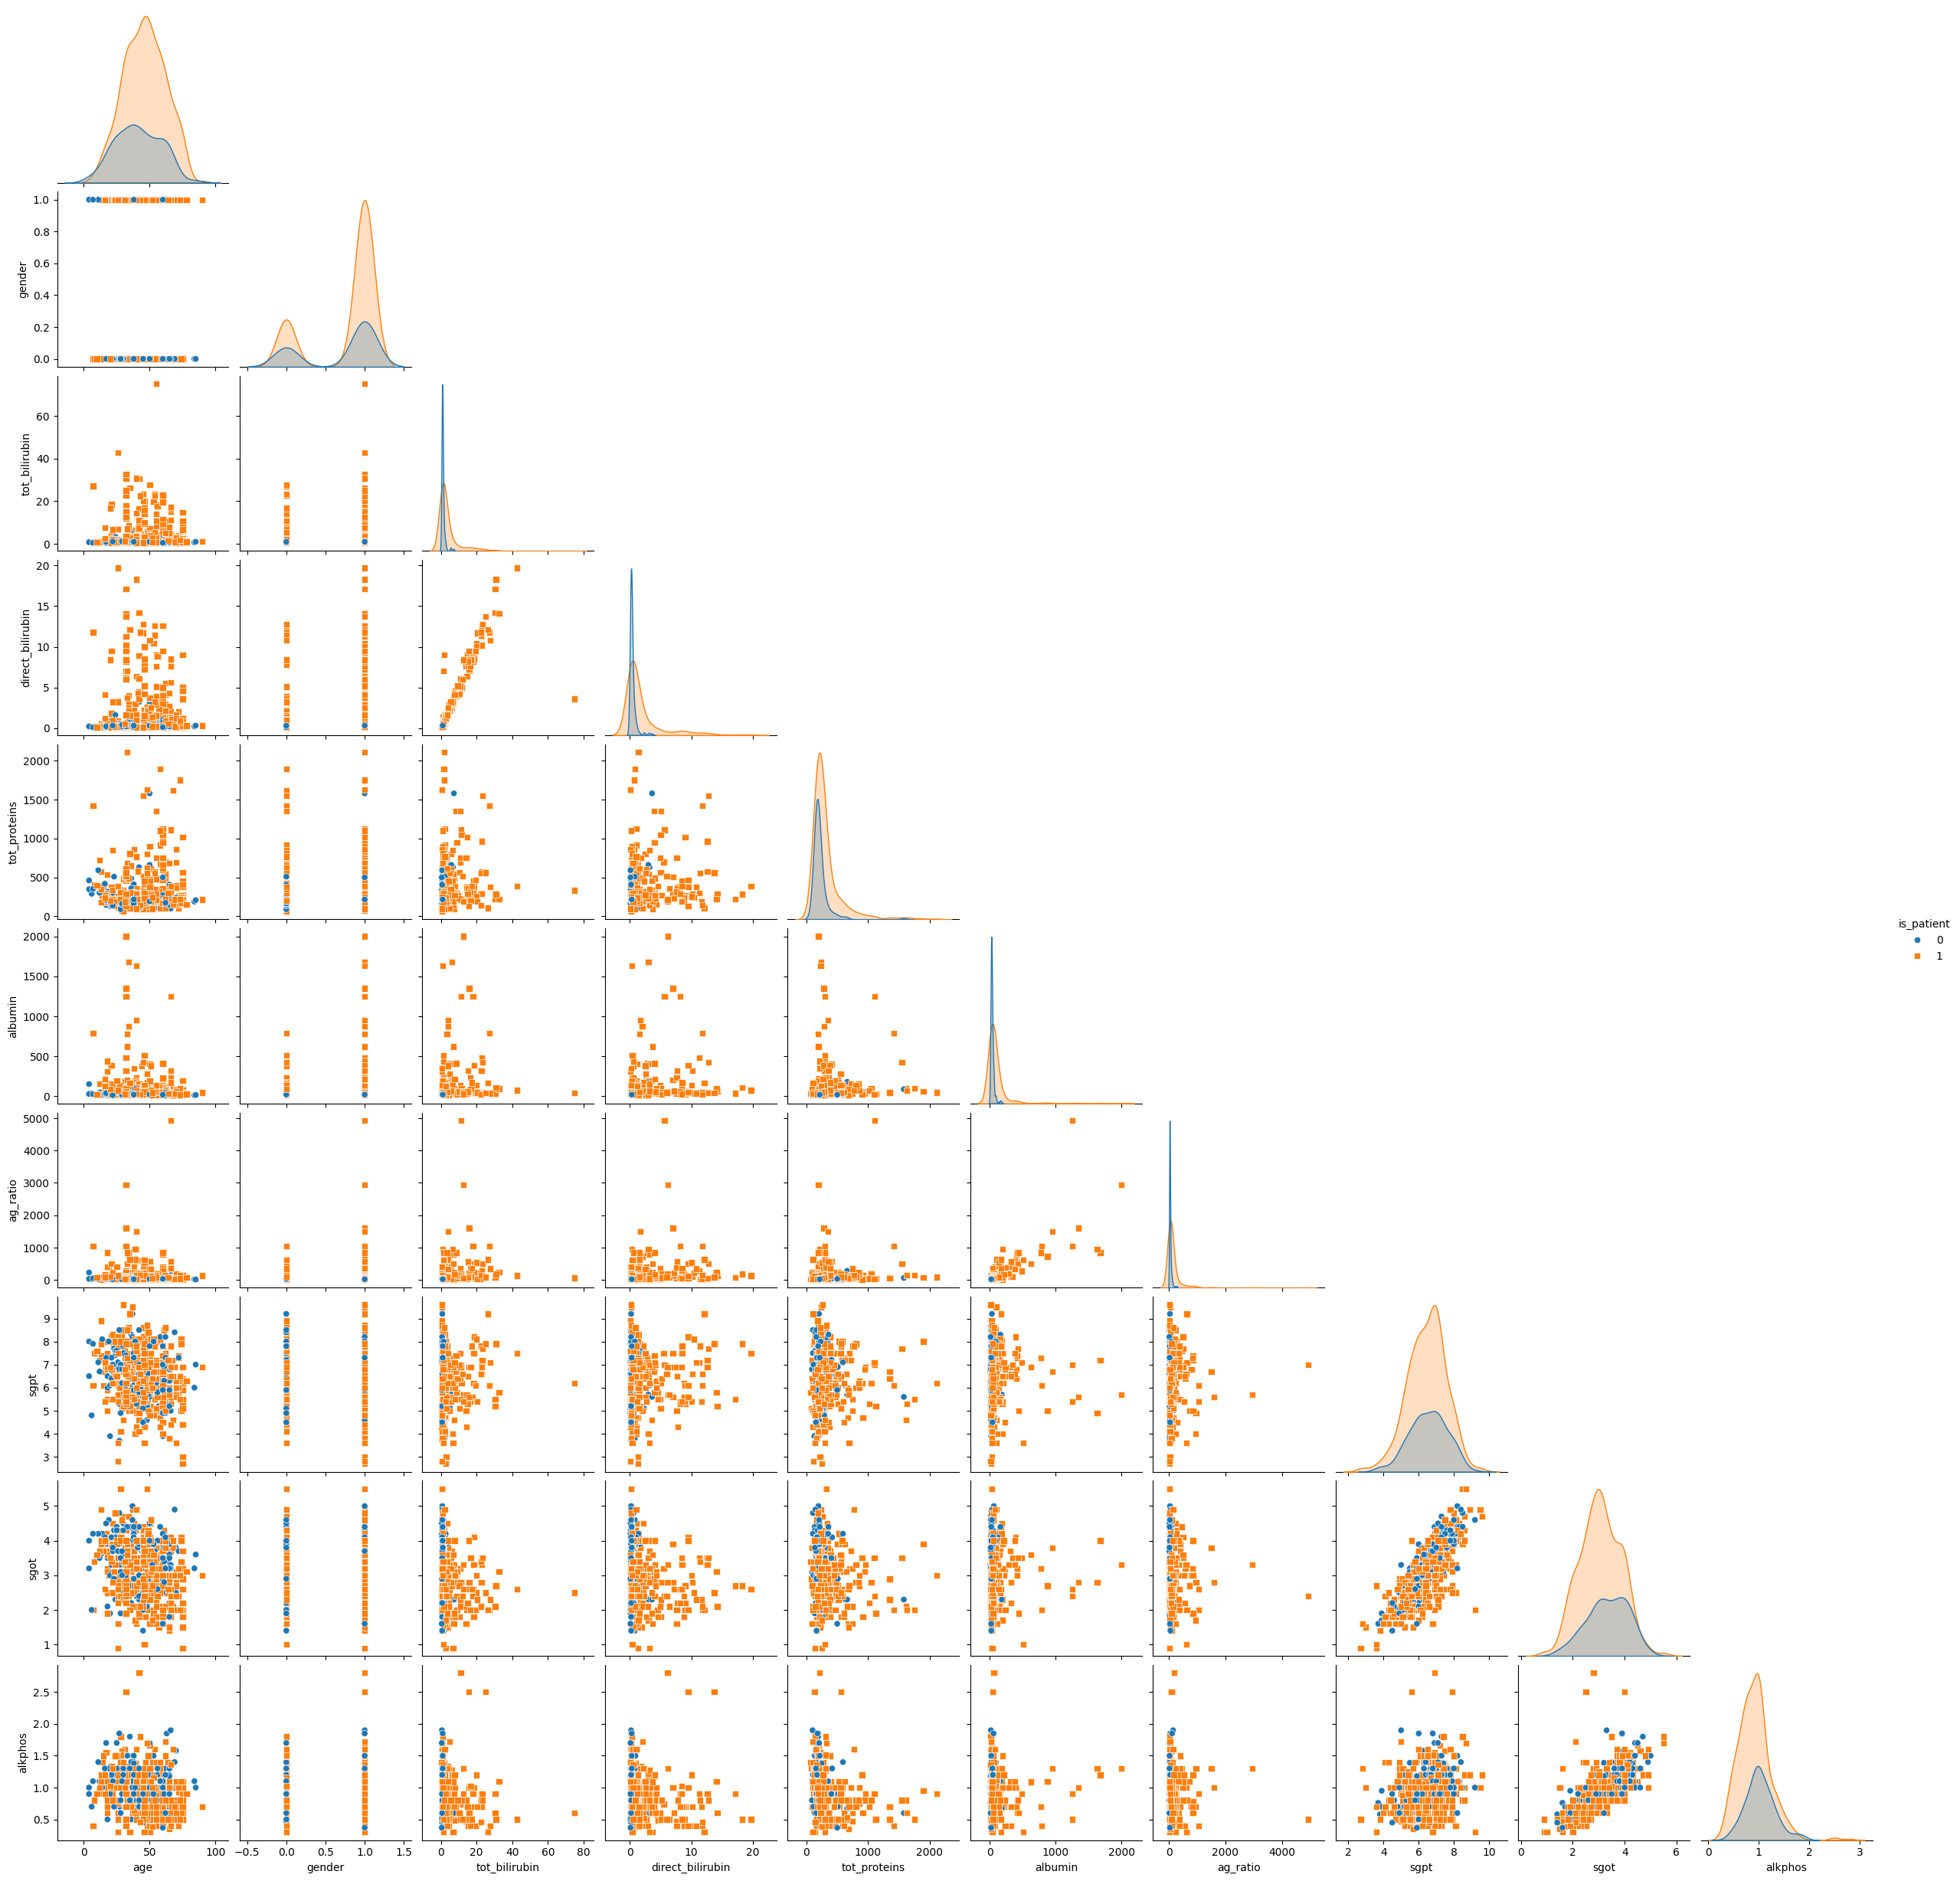

In [118]:
sns.pairplot(df,hue='is_patient',corner=True,markers=['o','s'])

In [119]:
df.isna().sum()

,0
age,0
gender,0
tot_bilirubin,0
direct_bilirubin,0
tot_proteins,0
albumin,0
ag_ratio,0
sgpt,0
sgot,0
alkphos,4


In [120]:
df.fillna(df.mean(),inplace=True)
df.isna().sum()

,0
age,0
gender,0
tot_bilirubin,0
direct_bilirubin,0
tot_proteins,0
albumin,0
ag_ratio,0
sgpt,0
sgot,0
alkphos,0


**Applying a Model on it**

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [122]:
df_scale=StandardScaler().fit_transform(df)
X=df.drop('is_patient',axis=1)
y=df['is_patient']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

**Logistic regression**

In [123]:
param= {'penalty':('l1','l2'),'C':[0.01,0.1,1,10,100,1000]}
LR=LogisticRegression(solver='saga')
clf= GridSearchCV(LR,param,cv=5,scoring=accuracy_score,n_jobs=-1)
clf.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ('l1', 'l2')},
             scoring=<function accuracy_score at 0x7fdd2f886a20>)

In [124]:
y_pred=clf.predict(X_test)

In [125]:
new_var = classification_report(y_test,y_pred)
pd.DataFrame(new_var.split('\n'),columns=['classification_report']).T

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0,1,2,3,4,5,6,7,8
classification_report,precision recall f1-score ...,,0 0.00 0.00 0.00 ...,1 0.71 1.00 0.83 ...,,accuracy 0.71 ...,macro avg 0.35 0.50 0.41 ...,weighted avg 0.50 0.71 0.59 ...,


**SVC**

In [143]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
param= {'C':[0.1,1,10,100,],'gamma':[1,0.1,0.01,],'degree':[3,4,5]}
clf= GridSearchCV(svc,param,cv=5,scoring=accuracy_score,n_jobs=-1)
clf.fit(X_train,y_train)

clf.best_estimator_.score(X_test,y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


0.7085714285714285

In [144]:
accuracy_score(y_test,clf.predict(X_test))
clf.predict(X_test) # Not classified well because they are not classiable by these algorithums only predict 1 for All

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

*Not classified well because they are not classiable by these algorithums only predict 1 for All*

**Now, applying KernelPCA to make features seperable**

In [148]:
from sklearn.decomposition import PCA
kpca=PCA(n_components=4)
X_kpca_tr=kpca.fit_transform(X_train)
X_kpca_ts=kpca.transform(X_test)

In [149]:
clf.fit(X_kpca_tr,y_train)
accuracy_score(clf.predict(X_kpca_ts),y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


0.7085714285714285

**No way that the data is seperable**